# Capítulo 2

## Perceptrón simple

### Implementa el algoritmo del perceptrón simple y utilízalo en los siguientes casos. $X_{1}$ y $X_{2}$ son las entradas al perceptrón y $d$ la señal de salida.

**Puerta AND:**
| $X_{1}$ | $X_{2}$ | $d$ |
| ------- | ------- | --- |
| 0       | 0       | 0   |
| 0       | 1       | 0   |
| 1       | 0       | 0   |
| 1       | 1       | 1   |

**Puerta OR:**
| $X_{1}$ | $X_{2}$ | $d$ |
| ------- | ------- | --- |
| 0       | 0       | 0   |
| 0       | 1       | 1   |
| 1       | 0       | 1   |
| 1       | 1       | 1   |

**Puerta XOR:**
| $X_{1}$ | $X_{2}$ | $d$ |
| ------- | ------- | --- |
| 0       | 0       | 0   |
| 0       | 1       | 1   |
| 1       | 0       | 1   |
| 1       | 1       | 0   |

**Puerta NOT:**
| $X_{1}$ | $d$ |
| ------- | --- |
| 0       | 1   |
| 1       | 0   |

Representa el error cometido en los cuatro patrones frente al número de épocas. La medida a representar es la suma de los 4 errores (al cuadrado) que se producen al pasar todos los patrones frente al número de repeticiones (épocas).

Como hemos visto en teoría, el perceptró se basa en comparar la salida del sistema con una señal deseada. El algoritmo del perceptrón consiste en las siguientes etapas:

1. Inicialización aleatoria de los coeficientes (pesos sinápticos) $w_{k}$.
2. Inicialización del parámetro $\alpha$.
3. Obtención de la salida a partir del vector de entrada: $\hat{y} = \mathrm{signo}\left( \sum_{k=0}^{n} w_{k}x_{k} \right)$
4. Obtención del error: $\varepsilon (\hat{y}) = y - \hat{y}$
5. Actualización de los coeficientes: $w_{k} = w_{k} + \alpha \varepsilon(\hat{y}) x_{k}$
6. Vuelta al paso 3.

Empezaremos definiendo la clase que contendrá los pesos de nuestro modelo:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Opciones generales de Matplotlib para ajustar las figuras
plt.rcParams['figure.figsize'] = [9, 4]
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['image.cmap'] = 'binary'

In [4]:
class PerceptronSimple():
    def __init__(self, input_shape, alpha):
        ## Inicializamos la bias a 1 y los pesos aleatoriamente
        self.w_0 = 1
        self.w_k = np.random.normal(size=input_shape)
        ## Guardamos el valor de alpha para la actualización de los pesos
        self.alpha = alpha

    def __call__(self, x):
        """
        El método __call__() es el que se ejecutará cuando hagamos PerceptronSimple(x).
        Tiene que implementar el sumatorio del producto de los pesos por las entradas más la bias
        activado con la función signo.
        """
        return np.sign(np.sum(self.w_k*x, axis=-1) + self.w_0)

    def update(self, error, x):
        ## Actualizamos el valor de los pesos según la ecuación (5)
        self.w_0 = self.w_0 + self.alpha*error
        self.w_k = self.w_k + self.alpha*error*x

Definimos los vectores que contendrán las entradas al modelo:

In [5]:
X_AND_OR_XOR = np.array([[0,0], [0,1], [1,0], [1,1]])
X_NOT = np.array([[0], [1]])

## Recordemos que hay que codificar los 0s como -1s por la función signo
Y_AND = np.array([-1, -1, -1, 1])
Y_OR = np.array([-1, 1, 1, 1])
Y_XOR = np.array([-1, 1, 1, -1])
Y_NOT = np.array([1, -1])

#### Bucle de entrenamiento

Como tenemos que entrenar un modelo distinto para cada puerta lógica, lo más cómodo es que creemos una función de entrenamiento que podamos reutilizar.

In [6]:
def train(model, X, Y, epochs=20, verbose=True):
    ## Creamos una lista para almacenar los errores de cada época.
    ## De esta manera luego podemos representarlos.
    train_error = []
    for epoch in range(epochs):
        ## También necesitamos una lista para almacenar los errores de cada muestra.
        epoch_error = []
        ## Iteramos sobre los ejemplos que tenemos
        for X_i, Y_i in zip(X, Y):
            ## Obtención de la predicción del modelo
            Y_i_pred = model(X_i)
            ## Cálculo del error
            error = Y_i-Y_i_pred
            epoch_error.append(error**2)
            ## Actualización de los coeficientes
            model.update(error, X_i)  
        train_error.append(np.sum(epoch_error))
        if verbose:
            print(f"Época {epoch+1} --> Error: {train_error[-1]}")
    return train_error

Ahora podemos utilizar un bucle `for` para entrenar un modelo por cada puerta y comprobar los resultados.

In [7]:
data = {
    "AND":{"X":X_AND_OR_XOR, "Y":Y_AND},
    "OR":{"X":X_AND_OR_XOR, "Y":Y_OR},
    "XOR":{"X":X_AND_OR_XOR, "Y":Y_XOR},
    "NOT":{"X":X_NOT, "Y":Y_NOT},
}

In [42]:
results = {}
for puerta_logica_nombre, puerta_logica_data in data.items():
    model = PerceptronSimple(input_shape=puerta_logica_data["X"].shape[-1], alpha=0.1)
    results[puerta_logica_nombre] = {
            'errores':train(model, puerta_logica_data["X"], puerta_logica_data["Y"], verbose=False),
            'modelo':model}

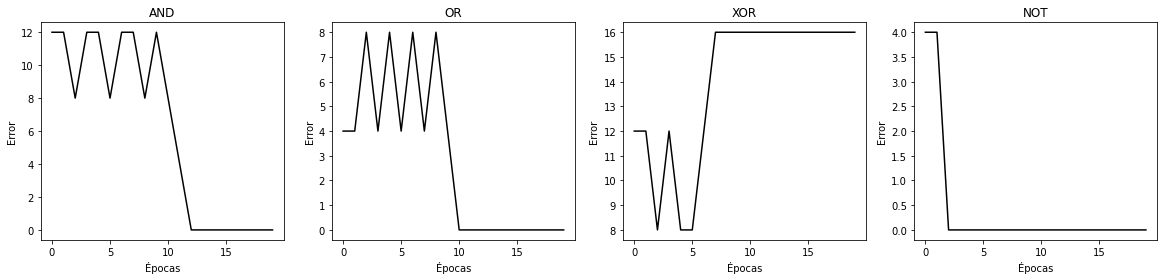

In [46]:
n_plots = len(results)
plt.figure(figsize=(5*n_plots, 4))
for i, (n, d) in enumerate(results.items(),1):
    plt.subplot(1,n_plots,i)
    plt.title(n)
    plt.plot(d['errores'], 'k-')
    plt.xlabel("Épocas")
    plt.ylabel("Error")
# plt.savefig("Images/PS_Losses.png")
plt.show()  

Podemos ver que el perceptrón simple es capaz de apreder todas las puertas lógicas menos la XOR. 
> ¿Por qué?
XOR es una puerta lógica no linealmente separable, por lo que el perceptrón simple no es capaz de resolverlo. El resto de puertas sí que son todas linealmente separables y se resuelven correctamente con este modelo.

#### Dibujar la frontera de decisión

Podemos dibujar la frontera de decisión para ver cómo nuestro modelo separa los diferentes puntos en el espacio.

> La frontera de decisión se calcula igualando a 0 el producto de los pesos por las entradas más la bias: $w_{0} + \sum_{k=1}^{N} w_{k}x_{k} = 0$. En nuestro caso bidimensional esto da lugar a la ecuación de una recta: $x_{1} = -\frac{w_{2}}{w_{1}}x_{2} - \frac{w_{0}}{w_{1}}$.

Podemos crear una función genérica que nos calcule esta frontera de decisión para representarla cómodamente en todos los casos que vamos a estudiar:

In [29]:
def decision_boundary(model, xmin=-10, xmax=10):
    if len(model.w_k)==2:
        pendiente = -(model.w_k[1]/model.w_k[0])
        offset =  - (model.w_0/model.w_k[0])
    elif len(model.w_k)==1:
        pendiente = 0
        offset =  - (model.w_0/model.w_k[0])
    x = np.linspace(xmin, xmax, 500)
    return x, pendiente*x + offset

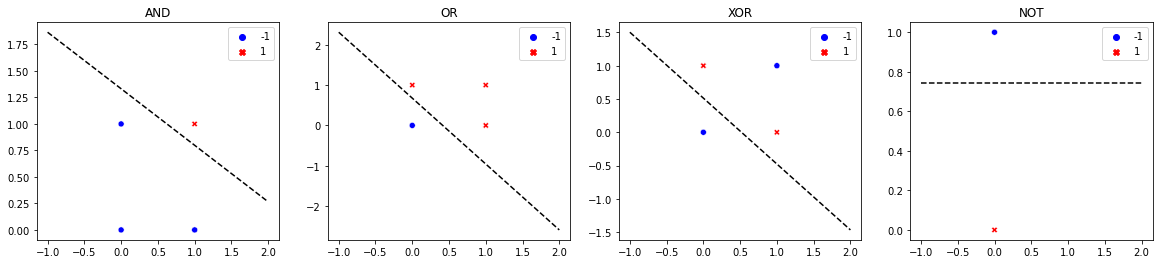

In [48]:
n_plots = len(results)
plt.figure(figsize=(5*n_plots, 4))
for i, (n, d) in enumerate(results.items(),1):
    plt.subplot(1,n_plots,i)
    plt.title(n)
    if data[n]['X'].shape[-1] > 1:
        sns.scatterplot(x=data[n]['X'][:,0], y=data[n]['X'][:,1], style=data[n]['Y'], hue=data[n]['Y'], palette=["blue", "red"])
    else:
        sns.scatterplot(x=np.zeros_like(data[n]['X'][:,0]), y=data[n]['X'][:,0], style=data[n]['Y'], hue=data[n]['Y'], palette=["blue", "red"])
    plt.plot(*decision_boundary(d['modelo'], -1, 2), '--k', label="Frontera de decisión")
# plt.savefig("Images/Fronter_Perceptron.png")
plt.show()  

### Comprobación de funciones linealmente separables.

El perceptrón nos proporciona un modo indirecto para comprobar si una función es linealmente separable o no (comprobando la convergencia final del algoritmo). Usando el algoritmo implementado en el punto anterior determina si las siguientes funciones lógicas son linealmente separables o no ($\bar{x}$ indica el conjugado de x; todas las variables son binarias y d es la señal deseada):

* $d = \mathrm{sign}(x_{1}x_{2}x_{3} + \bar{x}_{1}x_{3} + \bar{x}_{2}x_{1})$
* $d = \mathrm{sign}(x_{1}x_{2}x_{4} + \bar{x}_{1}x_{4} + \bar{x}_{3}x_{4} + x_{1}x_{2})$
* $d = \mathrm{sign}(x_{1}x_{2}\bar{x}_{1}x_{4} + \bar{x}_{2}x_{3} + \bar{x}_{1}x_{4} + x_{2}x_{4})$

## ADALINE. Algoritmo LMS.

### Vuelve a determinar el primer apartado (salvo para la puerta XOR) pero usando el modelo ADALINE el algoritmo LMS (Least Mean Square); recuerda que en el perceptrón la salida se obtiene tras la función signo mientras que en el caso de la Adaline se considera la salida antes de la función signo. Si inicializas de forma diferente, ¿qué obtienes en el caso del perceptrón? ¿y en el caso de la Adaline?

Este modelo queda representado por la siguiente figura: ![Adalina](Adalina.png) 

La principal diferencia con respecto al perceptrón es dónde se obtiene la realimentación del error; en este caso es antes del cálculo de la función signo. Este pequeño cambio, que parece sin importancia, va a permitir utilizar uno de los algoritmos que más uso tiene actualmente en los modelos de inteligencia artificial. El cambio en la realimentación permitió plantear un elemento que no se tenía antes con el perceptrón: una función de coste o de error. Esta función define la calidad del modelo. La característica que tiene es que un extremo suyo (máximo o mínimo) indica el funcionamiento óptimo del sistema. 

Se plantea un procedimiento iterativo para encontrar la solución conocido como descenso por gradiente. De forma intuitiva consiste en inicializar de forma aleatoria los parámetros y descender por la superficie de error hasta encontrar el mínimo de dicha función (si se busca el máximo se cambia el signo de la función y, entonces, el objetivo pasa a ser un mínimo). 

De forma análoga al algoritmo del perceptrón simple se tienen los siguientes pasos:
1. Inicialización aleatoria de los coeficientes, pesos sinápticos, $w_{k}$. 
2. Inicialización del parámetro $\alpha$. 
3. Obtención de la salida a partir del vector de entrada: $\hat{y} = \sum_{k=0}^{n}w_{k}x_{k}$
4. Obtención del error: $\varepsilon(y) = y - \hat{y}$
5. Actualización de los coeficientes $w_{k} = w_{k} + {α}\varepsilon(y)x_{k}$
6. Vuelta al paso 3.


In [50]:
class Adalina():
    def __init__(self, input_shape, alpha):
        ## Inicializamos la bias a 1 y los pesos aleatoriamente
        self.w_0 = 1
        self.w_k = np.random.normal(size=input_shape)
        ## Guardamos el valor de alpha para la actualización de los pesos
        self.alpha = alpha

    def __call__(self, x):
        """
        El método __call__() es el que se ejecutará cuando hagamos Adalina(x).
        Tiene que implementar el sumatorio del producto de los pesos por las 
        entradas más la bias activado con la función signo.
        """
        return np.sum(self.w_k*x, axis=-1) + self.w_0

    def update(self, error, x):
        ## Actualizamos el valor de los pesos según la ecuación (5)
        self.w_0 = self.w_0 + self.alpha*error
        self.w_k = self.w_k + self.alpha*error*x

In [51]:
data = {
    "AND":{"X":X_AND_OR_XOR, "Y":Y_AND},
    "OR":{"X":X_AND_OR_XOR, "Y":Y_OR},
    "NOT":{"X":X_NOT, "Y":Y_NOT},
}

In [52]:
def train_adalina(model, X, Y, epochs=20, verbose=True):
    ## Creamos una lista para almacenar los errores de cada época.
    ## De esta manera luego podemos representarlos.
    train_error = []
    for epoch in range(epochs):
        ## También necesitamos una lista para almacenar los errores de cada muestra.
        epoch_error = []
        ## Calculamos todas las predicciones de golpe y calculamos el error cudrático
        ## medio de todo el batch.
        for X_i, Y_i in zip(X, Y):
            ## Obtención de la predicción del modelo
            Y_i_pred = model(X_i)
            ## Cálculo del error
            error = Y_i-Y_i_pred
            epoch_error.append(error**2)
            ## Actualización de los coeficientes
            model.update(error, X_i)  
        train_error.append(np.sum(epoch_error))
        if verbose:
            print(f"Época {epoch+1} --> Error: {train_error[-1]}")
    return train_error  

In [53]:
results = {}
for puerta_logica_nombre, puerta_logica_data in data.items():
    model = Adalina(input_shape=puerta_logica_data["X"].shape[-1], alpha=0.1)
    results[puerta_logica_nombre] = {
            'errores':train_adalina(model, puerta_logica_data["X"], puerta_logica_data["Y"], epochs=50, verbose=False),
            'modelo':model}

Podemos aperciar que en este caso, al no utilizar la función signo para determinar las salidas, las funciones de pérdida tienen una forma contínua que baja suavemente hasta un mínimo.

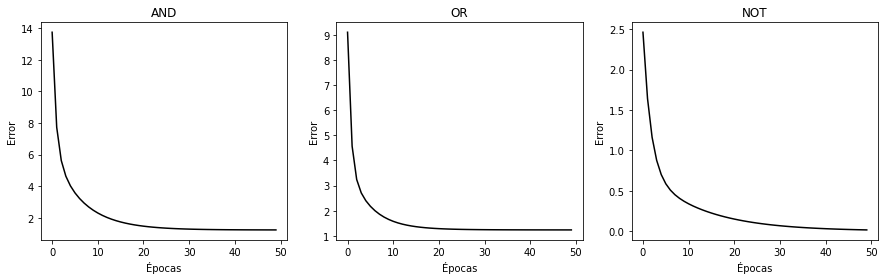

In [56]:
n_plots = len(results)
plt.figure(figsize=(5*n_plots, 4))
for i, (n, d) in enumerate(results.items(),1):
    plt.subplot(1,n_plots,i)
    plt.title(n)
    plt.plot(d['errores'], 'k-')
    plt.xlabel("Épocas")
    plt.ylabel("Error")
# plt.savefig("Images/losses_adalina.png")
plt.show()  

Esto permite, entre otras cosas, que las fronteras de decisión sean más suaves y se adapten mejor a los distintos problemas.

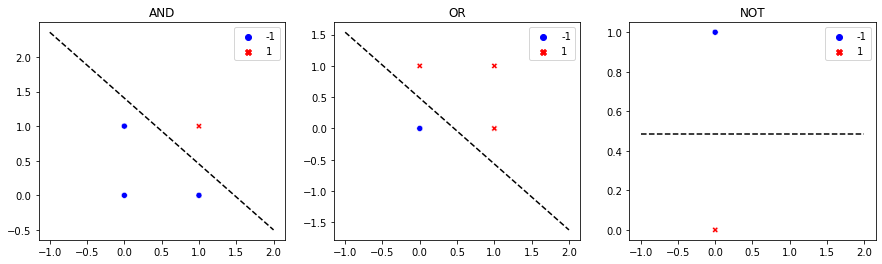

In [58]:
n_plots = len(results)
plt.figure(figsize=(5*n_plots, 4))
for i, (n, d) in enumerate(results.items(),1):
    plt.subplot(1,n_plots,i)
    plt.title(n)
    if data[n]['X'].shape[-1] > 1:
        sns.scatterplot(x=data[n]['X'][:,0], y=data[n]['X'][:,1], style=data[n]['Y'], hue=data[n]['Y'], palette=["blue", "red"])
    else:
        sns.scatterplot(x=np.zeros_like(data[n]['X'][:,0]), y=data[n]['X'][:,0], style=data[n]['Y'], hue=data[n]['Y'], palette=["blue", "red"])
    plt.plot(*decision_boundary(d['modelo'], -1, 2), '--k', label="Frontera de decisión")
# plt.savefig("Images/frontera_adalina.png")
plt.show()  

### Aplicación práctica I. Algoritmo LSM. Eliminación variación línea base.

Vamos a ver la aplicación de un filtro adaptativo de un solo coeficiente. Se plantea un esquema típico de cancelación de eco como se muestra en la figura:

![Cancelacion_Eco](Cancelacion_Eco.png)

Nos planteamos eliminar la variación que suponemos muy lenta, por lo que asumiremos que dicha variación es igual a un valor constante; ese valor lo representaremos por $w_{0}$, siendo la salida del filtro adaptativo igual a a $w_{0}\times 1$. Vamos a implementar el algoritmo LMS en este caso conociendo que:

a) $d(n)$ es la señal deseada, en este caso es la señal del electrocardiograma que se encuentra en el fichero `vlb.mat`.
b) Lo que se busca representar es el error cometido, $e(n)$, en cada iteración.
c) Comprueba el funcionamiento del sistema para diferentes constantes de adaptación.

### Cancelador Activo de Ruido

La estructura de un cancelador activo de ruido viene dada por el siguiete esquema:

![Cancelador_Activo_Ruido](Cancelador_Activo_Ruido.png)

Un ejemplo clásico de esta estructura es la obtención del electrocardiograma fetal teniendo como principal interferencia el electrocardiograma materno. El problema es que estas dos señales tienen un contenido espectral similar por lo que intentar un filtrado selectivo en frecuencia supone distorsionar la señal de interés; en este caso el electrocardiograma fetal. Como solución se plantea un cancelador activo de ruido donde la señal deseada es la señal que se obtiene del abdomen de la madre (tiene componentes maternos y fetales) y la señal de entrada al filtro adaptativo es la señal que se obtiene del sensor que se le coloca en el pecho a la madre; este sensor tomaría, en principio, solo componente materna. El sistema adaptativo modelizaría la componente materna que se encuentra en el sensor que se coloca en el abdomen de la madre de tal forma que la señal de error resultante sólo tendría componente fetal. El fichero `fetal_lms.mat` contiene dos señales; la torácica y la abdominal; la torácica será la entrada al filtro adaptativo y la abdominal es la que contiene las dos componentes (fetal y materna modificada). Determina:

a)  La visualización de ambas señales.

b) Implementa el algoritmo LMS en esta aplicación (puedes usar el código del punto anterior cambiando las señales de entrada al filtro y la señal deseada); varía la longitud del filtro y la constante de adaptación.

c) Visualiza el error cometido; ¿qué ocurre con el complejo QRS (¡los picos!) de la madre en la señal de salida?

## Perceptrón multicapa

En esta sección implementaremos un perceptrón multicapa y lo utilizaremos posteriormente para resolver una tarea de clasficación y otra de regresión.

### Definición de las funciones de activación y sus derivadas

In [17]:
def linear_fn(x):
    return x
def dlinear_fn(x):
    return np.ones_like(x)
def relu_fn(x):
    x[x<0] = 0
    return x
def drelu_fn(x):
    x[x<0] = 0
    x[x>=0] = 1
    return x
def sigmoid_fn(x):
    # Tenemos que clipear los valores de entrada para evitar el overflow
    x = np.clip(x, -500, 500)
    return 1.0/(1+np.exp(-x))
def dsigmoid_fn(x):
    loss = sigmoid_fn(x)*(1-sigmoid_fn(x))
    loss = np.clip(loss, -100, 100)
    return loss

### Definición de las funciones de coste y sus derivadas

In [18]:
def mse(Y_true, Y_pred):
    return (Y_true - Y_pred).sum(axis=-1)**2
def dmse(Y_true, Y_pred):
    return -2*(Y_true - Y_pred)

## En el caso de la BCE añadimos un valor muy pequeño a los logaritmos y las divisiones
## para asegurarnos de que no se produce ni log(0) ni divisiones por 0.
def bce(Y_true, Y_pred):
    return -(Y_true*np.log(Y_pred + 1e-5)+(1-Y_true)*np.log(1-Y_pred + 1e-5)).sum(axis=-1)
def dbce(Y_true, Y_pred):
    return ((Y_pred-Y_true)/(Y_pred*(1-Y_pred) + 1e-10))

##### Definición de las clases

Para hacer el código lo más limpio y reutilizable posible vamos a crear dos clases:

- `Layer`: Representará una única capa del perceptrón y almacenará toda la información necesaria para su uso y el entrenamiento, como los pesos, las funciones de activación, las salidas y los valores de $\delta$ que se usarán para actualizar los pesos.
- `LayerStack`: Representará una apilación de capas `Layer` y permitirá realizar el entrenamiento y la inferencia de forma cómoda mediante los métodos `backpropagate()`, `update()` y `fit()`.

In [14]:
class Layer():
    def __init__(self, input_shape, neurons, activation='linear'):
        self.w_0 = np.ones(shape=(neurons,1))
        self.w_k = np.random.normal(size=(input_shape, neurons)).T
        self.activation, self.dactivation = self.set_activation(activation)
        self.z_k = None
        self.a_k = None
        self.delta_k = None
    
    def __call__(self, x):
        # Trasponemos para que sea consistente con la teoría, ya que espera un vector columna
        z_k = self.w_k @ x.T  + self.w_0
        a_k = self.activation(z_k)

        self.z_k = z_k
        self.a_k = a_k

        return a_k.T

    def set_activation(self, activation):
        possible_activations = {
            'linear': linear_fn,
            'relu': relu_fn,
            'sigmoid': sigmoid_fn
        }
        possible_dactivations = {
            'linear': dlinear_fn,
            'relu': drelu_fn,
            'sigmoid': dsigmoid_fn
        }

        return possible_activations[activation], possible_dactivations[activation]

En la última capa calculamos

$$
\delta_{k}^{L=F} = 2(y_{k} - \hat{y}_{k})^{2}f'(z_{k}^{L=F})
$$

Esto nos lleva a la ecuación de actualización:

$$
w_{kj}^{L=F} = w_{kj}^{L=F} - \alpha \delta_{k}^{L=F}a_{j}^{L=F-1}
$$

En la capas ocultas lo podemos calcular iterativamente partiendo de la última capa y propagando hacia detrás:

$$
\delta_{k}^{L} = f'(z_{k}^{L})\sum_{j}\delta_{j}^{L+1}w_{jk}^{L}
$$

Dónde los pesos se actualizan siguiendo la misma regla que antes (teniendo en cuenta que ahora la delta la calcularemos de forma distinta):

$$
w_{kj}^{L} = w_{kj}^{L} - \alpha \delta_{k}^{L}a_{j}^{L-1}
$$

In [15]:
class LayerStack():
    def __init__(self, input_shape, neurons, activations, alpha, loss):
        self.layers = self.generate_layers(input_shape, neurons, activations)
        self.alpha = alpha
        self.loss_fn = mse if loss=='mse' else (bce if loss=='bce' else print("El parámetro loss tiene que ser 'mse' o 'bce'."))
        self.dloss_fn = dmse if loss=='mse' else (dbce if loss=='bce' else print("El parámetro loss tiene que ser 'mse' o 'bce'."))

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def generate_layers(self, input_shape, neurons, activations):
        layers = []
        ## Creamos la primera capa y la metemos en la lista de capas
        input_layer = Layer(input_shape=input_shape, neurons=neurons[0], activation=activations[0])
        layers.append(input_layer)

        ## Creamos ahora las capas ocultas
        for i, (input_dim, output_dim) in enumerate(zip(neurons[0:-1], neurons[1:-1]), 1):
            layer = Layer(input_shape=input_dim, neurons=output_dim, activation=activations[i])
            layers.append(layer)
            
        ## Finalmente añadimos la última capa
        output_layer = Layer(input_shape=neurons[-2], neurons= neurons[-1], activation=activations[-1])
        layers.append(output_layer)
        return layers

    def backpropagate(self, Y_true, Y_pred):
        ## Calculamos la delta final 
        delta_F_k = self.dloss_fn(Y_true, Y_pred)*self.layers[-1].dactivation(self.layers[-1].z_k)
        self.layers[-1].delta_k = delta_F_k

        ## Utilizamos la delta final para calcular la delta de cada capa
        for i, layer in reversed(list(enumerate(self.layers[1:]))):
            delta_k = self.layers[i].dactivation(self.layers[i].z_k)*layer.w_k.T @ layer.delta_k
            self.layers[i].delta_k = delta_k.copy()

    def update(self, X):
        ## Actualizamos los pesos de la primera capa teniendo en cuenta que su input es X_i
        self.layers[0].w_k = self.layers[0].w_k - self.alpha*self.layers[0].delta_k @ X
        self.layers[0].w_0 = self.layers[0].w_0 - self.alpha*self.layers[0].delta_k

        ## Actualizamos los pesos menos los de la primera capa
        for L in range(1, len(self.layers)):
            self.layers[L].w_k = self.layers[L].w_k - self.alpha*self.layers[L].delta_k @ self.layers[L-1].a_k.T
            self.layers[L].w_0 = self.layers[L].w_0 - self.alpha*self.layers[L].delta_k 

    def fit(self, X, Y, epochs, verbose=True):
        losses = []

        for epoch in range(epochs):
            losses_epoch = []

            for X_i, Y_i in zip(X, Y):
                ## Añadimos una dimensión por consistencia con la teoría
                X_i = np.expand_dims(X_i,0)

                ## Calculamos una predicción y su error
                pred = self(X_i)
                loss = self.loss_fn(Y_true=Y_i, Y_pred=pred)
                losses_epoch.append(loss)
                
                ## Backpropagation para calcular las deltas
                self.backpropagate(Y_true=Y_i, Y_pred=pred)

                ## Actualizamos los pesos
                self.update(X_i)
                
            losses.append(np.mean(losses_epoch))
            if verbose:
                print(f"Época {epoch+1}: [Loss] {losses[-1]}")
                
        return losses

## MLP usado como clasificador

En este apartado vamos a usar el perceptrón multicapa en un problema de clasificación clínica. Para ello usaremos un conjunto de datos de salud que se puede considerar como un clásico, el de cáncer de mama de Wisconsin y que está accesible en [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) (además del repositorio del presente libro). Es un conjunto de datos con 32 entradas y una salida que define el tipo de tumor.

> Lo más sencillo es obtener el dataset directamente de la librearía `sklearn`.

Para resolver un problema de clasificación con un MLP tenemos que tener en consideración que la salida de la última capa tiene que representar una probabilidad y que tenemos que utilizar una función de coste acorde. Esto lo conseguimos utilizando, en la última capa, la función de activación sigmoide, que obliga a que nuestra salida esté contenida en el intervalo $[0,1]$ de forma que se puede interpretar como una probabilidad. Acorde con esto se utiliza la entropía cruzada binaria (Binary CrossEntropy) como función de coste. Esta función no se encarga solamente de penalizar las predicciones errones, también penaliza una predicción correcta pero poco segura. Al optimizarla estamos buscando un modelo que acierte y que, además, lo haga con seguridad. Tiene esta forma:

$$
J(y,\hat{y}) = \sum_{i}^{N} -y\mathrm{log}(\hat{y}) - (1-y)\mathrm{log}(1-\hat{y})
$$

Y su derivada:

$$
\frac{\delta J}{\delta \hat{y}} = \frac{\hat{y}-y}{\hat{y}(1-\hat{y})}
$$

### Carga de los datos

Los datos que vamos a utilizar los podemos descargar también directamente desde la librería `sklearn` mediante el parámetro `load_breast_cancer()`.

In [1]:
from sklearn.datasets import load_breast_cancer

In [5]:
X, Y = load_breast_cancer(return_X_y=True)
X.shape, Y.shape

((569, 30), (569,))

Es muy importante comprobar las distribuciones de las variables que vamos a introducir al modelo. Idealmente deberían estar todas en el rango $[-1,1]$ para asegurar la convergencia del modelo. En la siguiente figura se observa que esto no se cumple para todas las variables, así que lo mejor que podemos hacer es estandarizarlas restándoles su media y dividiendo por su desviación estándar. 

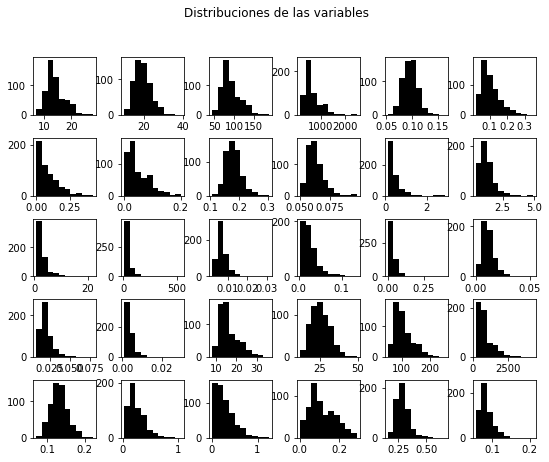

In [10]:
plt.figure(figsize=(9,7))
for i in range(X.shape[-1]):
    plt.subplot(5,6,i+1)
    plt.hist(X[:,i], color='k')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle("Distribuciones de las variables")
# plt.savefig("Images/distribuciones_cancer_negro.png")
plt.show()

Lo más correcto es dividir primero los datos en un conjunto de entrenamiento y un conjunto de test y utilizar las medias y distribuciones estándar del conjunto de entrenamiento para estandarizara los dos conjuntos. Así nos aseguramos de que no se filtra ningún tipo de información del conjunto de test al conjunto de entrenamiento y podemos estar tranquilos de que las métricas que obtengamos son fiables.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [13]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

X_train_std = (X_train - train_mean)/train_std
X_test_std = (X_test - train_mean)/train_std

In [20]:
model = LayerStack(X_train_std.shape[-1], [15, 15, 1], ['linear', 'linear', 'sigmoid'], alpha=0.001, loss='bce')
loss = model.fit(X_train_std, Y_train, epochs=10)

Época 1: [Loss] 1.4719268107756331
Época 2: [Loss] 0.6496624689361322
Época 3: [Loss] 0.5041690270556468
Época 4: [Loss] 0.40235816111672174
Época 5: [Loss] 0.3743078359865744
Época 6: [Loss] 0.3116904435807953
Época 7: [Loss] 0.3037085953529683
Época 8: [Loss] 0.27069089136026864
Época 9: [Loss] 0.24841131794744517
Época 10: [Loss] 0.23553931677509807


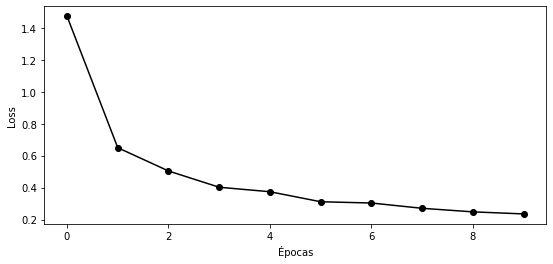

In [25]:
plt.figure()
plt.plot(loss, 'k-o')
plt.xlabel("Épocas")
plt.ylabel("Loss")
# plt.savefig("loss_cancer.png")
plt.show()

La evolución de la función de coste indica que el modelo es capaz de ir aprendiendo a predecir la variable objetivo. Tambibén podemos calcular, por ejemplo, la precisió para el conjunto de entrenamiento y el conjunto de test, donde observamos un resultado bastante bueno aunque sufriendo un poco de sobreentrenamiento.

In [87]:
from sklearn.metrics import accuracy_score

In [91]:
pred_train = model(X_train_std)
pred_train = np.where(pred_train > 0.5, 1, 0)
pred_test = model(X_test_std)
pred_test = np.where(pred_test > 0.5, 1, 0)

print(f"Precisión -> [Entrenamiento] {accuracy_score(Y_train, pred_train):.2f}% [Test] {accuracy_score(Y_test, pred_test):.2f}%")

Precisión -> [Entrenamiento] 0.98% [Test] 0.94%


## MLP usado como modelizador

En este apartado se plantea usar un perceptrón multicapa para predecir la progresión de la diabetes en un año para diferentes pacientes. Las dos diferencias principales respecto a un problema de clasificación como el anterior son:

1. La activación de la última capa.
2. La función de coste.

En un problema de clasificación lo normal es utilizar una función sigmoide como activación de la última capa para que el valor proporcionado por el modelo esté entre 0 y 1, y se pueda interpretar como una probabilidad. En cambio, lo que queremos predecir ahora será simplemente un valor numérico que puede tomar cualquier valor, asi que utilizaremos una función de activación lineal $f(x)=x$.
Respecto a la función de coste, en los problemas de clasificación se utiliza la entropía cruzada, mientras que en problemas de regresión lo que queremos es asegurarnos de que nuestras predicciones están lo más cerca posible del valor real, así que utilizamos el error cuadrático medio (*Mean Squared Error*). También es posible utilizar el arror absoluto medio (*Mean Absolute Error*) en lugar del cuadrático, pero este último fuerza al modelo a corregir más las predicciones muy alejadas de la real, por lo que suele dar mejores resultados.

$$
\mathrm{MSE} = \sum_{i}^{N} (y_{i} - \hat{y_{i}})^{2}
$$

Este cambio en la función de coste solamente afecta al cálculo de la $\delta^{L=F}$, ya que ahí interviene la derivada de la función de coste. La derivada del MSE es simplemente $\frac{\partial J}{\partial w_k} = -2(y-\hat{y})\frac{\partial \hat{y}}{\partial w_k}$.

### Carga de los datos

Los datos que vamos a utilizar los podemos descargar también directamente desde la librería `sklearn` mediante el parámetro `load_diabetes()`.

> Estos datos ya han sido centrados y escalados por la desviación estándar por el número de muestras.

In [26]:
from sklearn.datasets import load_diabetes

In [27]:
X, Y = load_diabetes(return_X_y=True)
X.shape, Y.shape

((442, 10), (442,))

Podemos representar las distribuciones de las variables para asegurarnos de que todas están contenidas en el rango deseado. Recordemos que para trabajar con un perceptrón multicapa es recomendable que las características de entrada estén contenidas entre -1 y 1 para facilitar la convergencia del modelo.

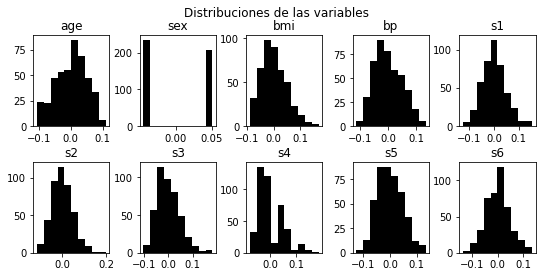

In [32]:
colnames = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
plt.figure()
for i in range(X.shape[-1]):
    plt.subplot(2,5,i+1)
    plt.title(colnames[i])
    plt.hist(X[:,i], color='k')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle("Distribuciones de las variables")
# plt.savefig("Images/distribuciones_diabetes_black.png")
plt.show()

Viendo esto podríamos pensar que nuestros datos están listos, ¡pero nos falta por comprobar la distribución de la variable objetivo! Esto es extremandamente importante, ya que si no transformamos también la variable objetivo para que esté en el mismo rango nuestro modelo será incapaz de aprender a predecirla. Pensemos que hay que realizar un montón de iteraciones para actualizar los pesos de forma que al multiplicarlos por un numero muy pequeño se obtenga un número muy grande. Esta transformación la realizaremos una vez tengamos separados los datos en conjunto de entrenamiento y test, ya que tendremos que transformar los valores del conjunto de test con los parámetros que obtengamos en el conjunto de entrenamiento. De esta forma se evita el goteo de información entre entrenamiento y test, que puede hacernos obtener unas métricas demasiado optimistas que no representen el rendimiento real de nuestro modelo.

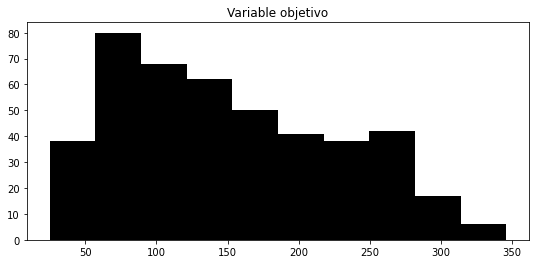

In [34]:
plt.figure()
plt.title("Variable objetivo")
plt.hist(Y, color='k')
# plt.savefig("Images/variable_objetivo_diabetes.png")
plt.show()

### Separación en conjunto de entrenamiento y conjunto de test

Una vez hemos cargado los datos y hemos comprobado que todos están en el rango deseado tenemos que separarlos en los conjuntos de entrenamiento y test. De esta forma podremos tener un conjunto de datos separado con el que comprobar la capacidad de generalización del modelo.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((309, 10), (309,), (133, 10), (133,))

Ahora sí, transformamos la variable objetivo restando la media y diviendo por la desviación estándar:

In [37]:
mean_Y = Y.mean(axis=0)
std_Y = Y.std(axis=0)
Y_train_std = (Y_train - mean_Y)/std_Y
Y_test_std = (Y_test - mean_Y)/std_Y

Podemos comprobar que ahora los rangos de la variable objetivo, tanto en el conjunto de entrenamiento como en el de test, están mucho más cerca del rango deseado.

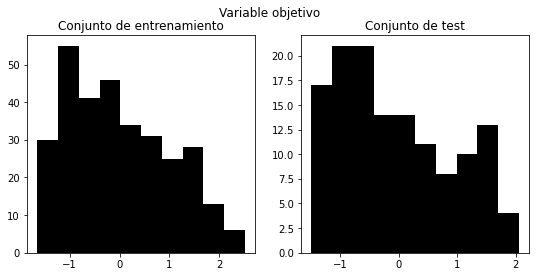

In [40]:
plt.figure()
plt.suptitle("Variable objetivo")
plt.subplot(1,2,1)
plt.title("Conjunto de entrenamiento")
plt.hist(Y_train_std, color='k')
plt.subplot(1,2,2)
plt.title("Conjunto de test")
plt.hist(Y_test_std, color='k')
# plt.savefig("Images/train_test_diabetes_black.png")
plt.show()

### Entrenamiento del modelo

Finalmente solamente nos queda entrenar el modelo y comprobar cómo de bien somos capaces de modelizar los datos:

In [41]:
model = LayerStack(X_train.shape[-1], [15, 15, 1], ['relu', 'relu', 'linear'], alpha=0.001, loss='mse')
loss = model.fit(X_train, Y_train_std, epochs=10)

Época 1: [Loss] 1.4126014738492518
Época 2: [Loss] 1.142462735173683
Época 3: [Loss] 1.0557153924888294
Época 4: [Loss] 1.001127881247278
Época 5: [Loss] 0.963054326541378
Época 6: [Loss] 0.9335983345112346
Época 7: [Loss] 0.9096938334359017
Época 8: [Loss] 0.8898286426602003
Época 9: [Loss] 0.8721870858987251
Época 10: [Loss] 0.8565209043847418


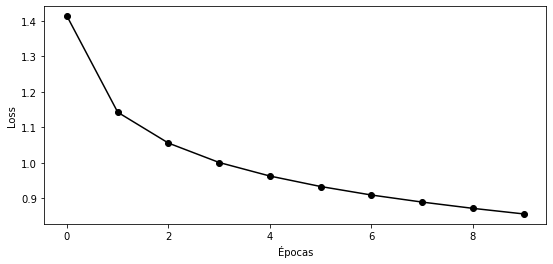

In [43]:
plt.figure()
plt.plot(loss, 'k-o')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.savefig("loss_diabetes.png")
plt.show()

La evolución de la función de coste indica que el modelo es capaz de ir aprendiendo a predecir la variable objetivo. Tambibén podemos calcular, por ejemplo, el MAE para el conjunto de entrenamiento y el conjunto de test. Hay que tener en cuenta que hemos transformado la variable objetivo, por lo que si queremos obtener el MAE respecto a la escala original tenemos que deshacer esta transformación:

$$
Y_{o} = Y_{std}\sigma_{Y} + \mu_{Y}
$$

In [67]:
from sklearn.metrics import mean_absolute_error

In [80]:
pred_train = model(X_train)
pred_test = model(X_test)

pred_train_o = pred_train*std_Y + mean_Y
pred_test_o = pred_test*std_Y + mean_Y

print(f"MAE -> [Entrenamiento] {mean_absolute_error(Y_train_std, pred_train):.2f} [Test] {mean_absolute_error(Y_test_std, pred_test):.2f}")
print(f"MAE -> [Entrenamiento] {mean_absolute_error(Y_train, pred_train_o):.2f} [Test] {mean_absolute_error(Y_test, pred_test_o):.2f}")

MAE -> [Entrenamiento] 0.94 [Test] 0.91
MAE -> [Entrenamiento] 72.02 [Test] 70.07


## Solución utilizando Tensorflow/Keras

In [38]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='linear', input_shape=(X.shape[-1],)),
    tf.keras.layers.Dense(15, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [40]:
plot_model(model, to_file="MLP_Classificacion.png", show_shapes=True)

KeyboardInterrupt: 

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), verbose=False)

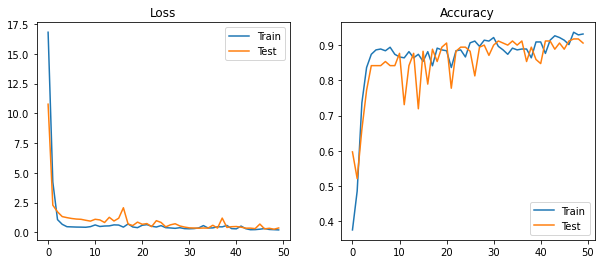

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='linear', input_shape=(X.shape[-1],)),
    tf.keras.layers.Dense(15, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_16 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 16        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_std, Y_train, epochs=50, validation_data=(X_test_std, Y_test), verbose=False)

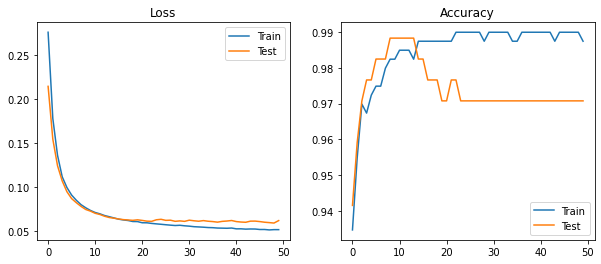

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend()
plt.show()